<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/CNN_CIFAR_100_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://www.cs.toronto.edu/~kriz/cifar.html

## This dataset has 100 classes containing 600 images each. There are 50000 training images and 10000 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

###

#Classification are

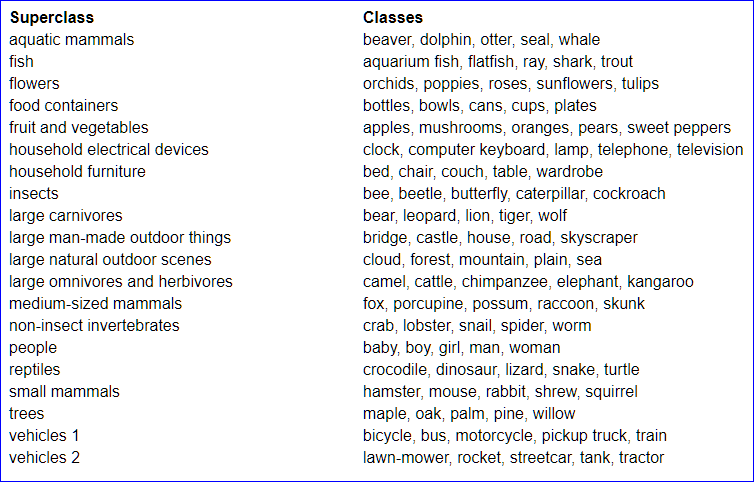

#Importing Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#LOAD DATASET IN TRAIN AND TEST



In [2]:
from keras.datasets import cifar100
(xtrain, ytrain), (xtest, ytest) = cifar100.load_data() # This pull the dataset of our interest

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
print("X train shape :", xtrain.shape)
print("y train shape :", ytrain.shape)
print("X test shape  :", xtest.shape)
print("y test shape  :", ytest.shape)

X train shape : (50000, 32, 32, 3)
y train shape : (50000, 1)
X test shape  : (10000, 32, 32, 3)
y test shape  : (10000, 1)


## Observation from shape
## 1. 50000 traning sample
## 2. 10000 Testing sample
## 3. each image is of shape of 32 x 32 x 3
## 4 . Output is multiclass- 100 classes.
## Output must be OHE using to_categorical
##  Model will have softmax at last FC layer, with 100 neurons as input.
## loss function - categoricalcross entropy.



array([[[198, 169, 157],
        [164, 124, 109],
        [156, 117, 103],
        ...,
        [130, 120, 140],
        [132, 122, 140],
        [187, 181, 191]],

       [[186, 149, 132],
        [140,  89,  67],
        [126,  76,  59],
        ...,
        [ 91,  78, 106],
        [ 95,  82, 109],
        [164, 155, 170]],

       [[190, 153, 135],
        [141,  91,  68],
        [129,  80,  63],
        ...,
        [ 96,  83, 109],
        [ 99,  86, 114],
        [167, 158, 172]],

       ...,

       [[232, 227, 226],
        [221, 213, 210],
        [223, 215, 213],
        ...,
        [155, 134, 129],
        [148, 124, 122],
        [191, 180, 178]],

       [[234, 229, 228],
        [224, 215, 213],
        [224, 216, 214],
        ...,
        [148, 127, 122],
        [143, 120, 118],
        [189, 178, 176]],

       [[238, 234, 233],
        [229, 221, 221],
        [229, 222, 220],
        ...,
        [154, 136, 134],
        [151, 134, 132],
        [195, 185, 183]]], dtype=uint8)
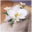

In [4]:
xtrain[1000]

In [5]:
np.unique(ytrain)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Normalise the xtrain and xtest
### The values are ranging from 0 to 255. So divide them by 255 to normliase

###
---



In [6]:
def normalise(x):
  return x/255



In [7]:
xtrain=normalise(xtrain)
xtest=normalise(xtest)

xtrain[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

## Input is x is ready, now output y is the catogorical output.there are 100 unique values.
## To feed these values to model, we need to first convern them in to OHE form.
## will use function to_categorical()

In [8]:
from keras.utils import to_categorical

n_classes = 100  # as y has 0 to 99 =100 classes

ytrain = to_categorical(ytrain, n_classes)
ytest  =  to_categorical(ytest, n_classes)
ytrain.shape, ytest.shape

((50000, 100), (10000, 100))

In [9]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Building model

In [22]:
model = Sequential()  # Stack up all layer sequentially.

# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())   # flatten output of convolutional layer

model.add(Dense(256, activation='relu'))  # FC layer 1
model.add(Dense(128, activation='relu'))  # FC layer 2
# output layer
model.add(Dense(100, activation='softmax')) #FC layer at output . at output layer neurons should be equal to number of classes and activation Softmax for multiclass
                                           # and sigmoid for binary class

In [24]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Multiclass - loss fuction should be categorical_crossentropy  for binary class - binary_crossentropy

## Aplying model to input data / Compilation



In [26]:
training_logs=model.fit(xtrain, ytrain, batch_size=32, epochs=10)  #Fitting the model and saving corrosponding values in variable 'history'

Epoch 1/10
1563/1563 [==============================] - 179s 115ms/step - loss: 3.2945 - accuracy: 0.2094
Epoch 2/10
1563/1563 [==============================] - 183s 117ms/step - loss: 2.7686 - accuracy: 0.3095
Epoch 3/10
1563/1563 [==============================] - 166s 106ms/step - loss: 2.3810 - accuracy: 0.3841
Epoch 4/10
1563/1563 [==============================] - 166s 106ms/step - loss: 2.0095 - accuracy: 0.4634
Epoch 5/10
1563/1563 [==============================] - 170s 109ms/step - loss: 1.6568 - accuracy: 0.5462
Epoch 6/10
1563/1563 [==============================] - 169s 108ms/step - loss: 1.3217 - accuracy: 0.6283
Epoch 7/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.0255 - accuracy: 0.7051
Epoch 8/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.7854 - accuracy: 0.7691
Epoch 9/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.6021 - accuracy: 0.8206
Epoch 10/10
1563/1563 [=======================

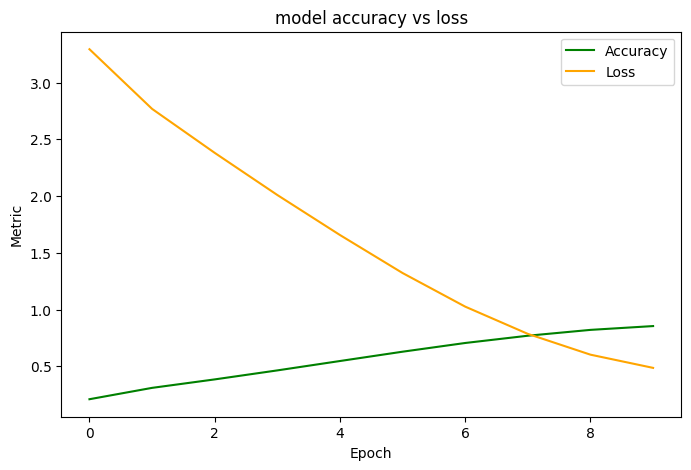

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(training_logs.history['accuracy'],label='Accuracy',color='green')
plt.plot(training_logs.history['loss'],label='Loss',color='orange')
plt.title('model accuracy vs loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()


### NOTE : Accuracy is in perecnetage while loss is numeric value.

## Applying Test dataset

In [32]:
test_loss, test_acc = model.evaluate(xtest, ytest)
test_loss, test_acc

313/313 [==============================] - 7s 23ms/step - loss: 5.5468 - accuracy: 0.2745


(5.546759128570557, 0.2745000123977661)

## **Not sure why Test accuracy is not increasing. Please assist**

# Prediction

##Defining list for label/class which we have

In [33]:
# Existing labels mapping

cifar_100_classes = {
    0: 'beaver', 1: 'dolphin', 2: 'otter', 3: 'seal', 4: 'whale',
    5: 'aquarium fish', 6: 'flatfish', 7: 'ray', 8: 'shark', 9: 'trout',
    10: 'orchids', 11: 'poppies', 12: 'roses', 13: 'sunflowers', 14: 'tulips',
    15: 'bottles', 16: 'bowls', 17: 'cans', 18: 'cups', 19: 'plates',
    20: 'apples', 21: 'mushrooms', 22: 'oranges', 23: 'pears', 24: 'sweet peppers',
    25: 'clock', 26: 'computer keyboard', 27: 'lamp', 28: 'telephone', 29: 'television',
    30: 'bed', 31: 'chair', 32: 'couch', 33: 'table', 34: 'wardrobe',
    35: 'bee', 36: 'beetle', 37: 'butterfly', 38: 'caterpillar', 39: 'cockroach',
    40: 'bear', 41: 'leopard', 42: 'lion', 43: 'tiger', 44: 'wolf',
    45: 'bridge', 46: 'castle', 47: 'house', 48: 'road', 49: 'skyscraper',
    50: 'cloud', 51: 'forest', 52: 'mountain', 53: 'plain', 54: 'sea',
    55: 'camel', 56: 'cattle', 57: 'chimpanzee', 58: 'elephant', 59: 'kangaroo',
    60: 'fox', 61: 'porcupine', 62: 'possum', 63: 'raccoon', 64: 'skunk',
    65: 'crab', 66: 'lobster', 67: 'snail', 68: 'spider', 69: 'worm',
    70: 'baby', 71: 'boy', 72: 'girl', 73: 'man', 74: 'woman',
    75: 'crocodile', 76: 'dinosaur', 77: 'lizard', 78: 'snake', 79: 'turtle',
    80: 'hamster', 81: 'mouse', 82: 'rabbit', 83: 'shrew', 84: 'squirrel',
    85: 'maple', 86: 'oak', 87: 'palm', 88: 'pine', 89: 'willow',
    90: 'bicycle', 91: 'bus', 92: 'motorcycle', 93: 'pickup truck', 94: 'train',
    95: 'lawn-mower', 96: 'rocket', 97: 'streetcar', 98: 'tank', 99: 'tractor'
}



In [34]:
def func_prediction(model,xinput):
  xinput=xinput.reshape(1,32,32,3) # reshape. 1 is needed to cnn to work with 4D vector.
  pred=model.predict(xinput)
  return pred

In [39]:
xinput=xtest[10]  # For now just taking vector from xtest set and applying as user input

pred=func_prediction(model,xinput)
pred

1/1 [==============================] - 0s 29ms/step


array([[9.87240867e-09, 6.11716387e-05, 1.08436989e-02, 2.41069653e-09,
        2.05130690e-10, 7.64595200e-07, 1.54460345e-09, 1.06843115e-16,
        3.20851318e-10, 4.06116624e-06, 1.13596972e-02, 2.54325947e-04,
        1.24498357e-07, 1.75427249e-05, 7.04560953e-04, 2.94268079e-06,
        1.94366485e-01, 2.64909801e-08, 2.94152301e-07, 1.39623502e-04,
        4.45440934e-10, 3.23139866e-05, 5.48106664e-06, 6.80925982e-10,
        3.20556542e-17, 3.85497260e-05, 5.56182933e-10, 1.69825398e-07,
        1.05327796e-02, 5.43001338e-11, 6.17582097e-11, 9.35145363e-06,
        4.28306528e-08, 8.09320954e-06, 4.56795624e-06, 8.15381296e-03,
        2.68049519e-07, 1.11472618e-05, 6.67497204e-08, 1.01089892e-09,
        1.07018866e-06, 2.66751221e-09, 1.08101194e-05, 5.23917576e-10,
        6.78571477e-10, 7.97040656e-09, 5.32627404e-01, 3.51770834e-19,
        2.84497946e-12, 3.48427349e-08, 1.00538449e-08, 2.64219258e-10,
        6.97381602e-19, 1.47889716e-13, 1.61899594e-09, 7.437620

In [40]:
pred_class = np.argmax(pred, axis=1)  ## argmax reverts OHE values to its orginal one.
pred_class

#This is giving the class of  output  for given xinput. ie class 30

array([46])

### Decoding this class label

In [41]:
#variable pred_class is numpy array,  extract value of 0th postion ie 3 and store and index

# get the lable at that index number from class_labels

pred_class_index = pred_class[0]
pred_label = cifar_100_classes.get(pred_class_index)
pred_class_index, pred_label

(46, 'castle')

## Code to get associated Super class

In [44]:
superclass_mapping = {
        'beaver': 'aquatic mammals', 'dolphin': 'aquatic mammals', 'otter': 'aquatic mammals', 'seal': 'aquatic mammals', 'whale': 'aquatic mammals',
        'aquarium fish': 'fish', 'flatfish': 'fish', 'ray': 'fish', 'shark': 'fish', 'trout': 'fish',
        'orchids': 'flowers', 'poppies': 'flowers', 'roses': 'flowers', 'sunflowers': 'flowers', 'tulips': 'flowers',
        'bottles': 'food containers', 'bowls': 'food containers', 'cans': 'food containers', 'cups': 'food containers', 'plates': 'food containers',
        'apples': 'fruit and vegetables', 'mushrooms': 'fruit and vegetables', 'oranges': 'fruit and vegetables', 'pears': 'fruit and vegetables', 'sweet peppers': 'fruit and vegetables',
        'clock': 'household electrical devices', 'computer keyboard': 'household electrical devices', 'lamp': 'household electrical devices', 'telephone': 'household electrical devices', 'television': 'household electrical devices',
        'bed': 'household furniture', 'chair': 'household furniture', 'couch': 'household furniture', 'table': 'household furniture', 'wardrobe': 'household furniture',
        'bee': 'insects', 'beetle': 'insects', 'butterfly': 'insects', 'caterpillar': 'insects', 'cockroach': 'insects',
        'bear': 'large carnivores', 'leopard': 'large carnivores', 'lion': 'large carnivores', 'tiger': 'large carnivores', 'wolf': 'large carnivores',
        'bridge': 'large man-made outdoor things', 'castle': 'large man-made outdoor things', 'house': 'large man-made outdoor things', 'road': 'large man-made outdoor things', 'skyscraper': 'large man-made outdoor things',
        'cloud': 'large natural outdoor scenes', 'forest': 'large natural outdoor scenes', 'mountain': 'large natural outdoor scenes', 'plain': 'large natural outdoor scenes', 'sea': 'large natural outdoor scenes',
        'camel': 'large omnivores and herbivores', 'cattle': 'large omnivores and herbivores', 'chimpanzee': 'large omnivores and herbivores', 'elephant': 'large omnivores and herbivores', 'kangaroo': 'large omnivores and herbivores',
        'fox': 'medium-sized mammals', 'porcupine': 'medium-sized mammals', 'possum': 'medium-sized mammals', 'raccoon': 'medium-sized mammals', 'skunk': 'medium-sized mammals',
        'crab': 'non-insect invertebrates', 'lobster': 'non-insect invertebrates', 'snail': 'non-insect invertebrates', 'spider': 'non-insect invertebrates', 'worm': 'non-insect invertebrates',
        'baby': 'people', 'boy': 'people', 'girl': 'people', 'man': 'people', 'woman': 'people',
        'crocodile': 'reptiles', 'dinosaur': 'reptiles', 'lizard': 'reptiles', 'snake': 'reptiles', 'turtle': 'reptiles',
        'hamster': 'small mammals', 'mouse': 'small mammals', 'rabbit': 'small mammals', 'shrew': 'small mammals', 'squirrel': 'small mammals',
        'maple': 'trees', 'oak': 'trees', 'palm': 'trees', 'pine': 'trees', 'willow': 'trees',
        'bicycle': 'vehicles 1', 'bus': 'vehicles 1', 'motorcycle': 'vehicles 1', 'pickup truck': 'vehicles 1', 'train': 'vehicles 1',
        'lawn-mower': 'vehicles 2', 'rocket': 'vehicles 2', 'streetcar': 'vehicles 2', 'tank': 'vehicles 2', 'tractor': 'vehicles 2'
}

In [47]:
pred_superclass =superclass_mapping.get(pred_label)
pred_superclass

'large man-made outdoor things'

## Visualisation

Text(0.5, 0, 'large man-made outdoor things: castle')

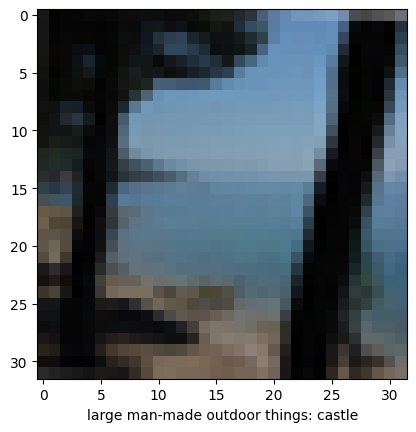

In [49]:
plt.imshow(xinput)
plt.xlabel (f"{pred_superclass}: {pred_label}")